In [3]:
#What are the key factor which drive the sale of the Car

In [4]:
# Create a model which can predict what would be my sales based on some factors

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import statsmodels.formula.api as smp #This is for modeling:Linear Regression
import seaborn as sns   #Plotting
import os   #Working directory

In [6]:
os.getcwd()

'C:\\Users\\Dell\\PYTHON'

In [7]:
os.listdir()

['.ipynb_checkpoints',
 'auto_holtwinters_UDF.ipynb',
 'auto_holtwinters_UDF.py',
 'Basic summary.xls',
 'Basics Of Python.ipynb',
 'Basic_summary.xls',
 'Car_sales.csv',
 'Churn_Modelling.csv',
 'Class exercise JAN batch.ipynb',
 'Clstr',
 'Clstr.csv',
 'CLUSTERING.ipynb',
 'Clus_data.xlsx',
 'corr.csv',
 'cust_data.xlsx',
 'Decomposition.csv',
 'EDA with pandas  2222.ipynb',
 'EDA with PANDAS.ipynb',
 'Groupby sum',
 'Groupby sum.xls',
 'heart.csv',
 'Merging by sir.ipynb',
 'Merging.ipynb',
 'Packages by sir.ipynb',
 'Packages.ipynb',
 'REGRESSION Analysis.ipynb',
 'Regression.ipynb',
 'scalled.csv',
 'snsdata1.csv',
 'Stat.csv',
 'Stats.csv',
 'Teen Market Segment using K mean Clustering.ipynb',
 'telco_csv.csv',
 'Telecom PCA.ipynb',
 'Time Series.ipynb',
 'Tractor-Sales.csv',
 '__pycache__']

In [8]:
car=pd.read_csv("Car_sales.csv")

In [9]:
car

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [10]:
car.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'four_year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [11]:
car.drop(columns=["Manufacturer","Model","Latest_Launch"],inplace=True)

In [12]:
#df.isnull().sum().sort_values(ascending=False)

### Univariate Analysis

In [13]:
car.shape

(157, 13)

In [14]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sales_in_thousands      157 non-null    float64
 1   four_year_resale_value  121 non-null    float64
 2   Vehicle_type            157 non-null    object 
 3   Price_in_thousands      155 non-null    float64
 4   Engine_size             156 non-null    float64
 5   Horsepower              156 non-null    float64
 6   Wheelbase               156 non-null    float64
 7   Width                   156 non-null    float64
 8   Length                  156 non-null    float64
 9   Curb_weight             155 non-null    float64
 10  Fuel_capacity           156 non-null    float64
 11  Fuel_efficiency         154 non-null    float64
 12  Power_perf_factor       155 non-null    float64
dtypes: float64(12), object(1)
memory usage: 16.1+ KB


In [15]:
car.describe().T  #if std is greater than mean so it means there is outliers existing.

,count,mean,std,min,25%,50%,75%,max
Sales_in_thousands,157.0,52.998076,68.029422,0.110000,14.114000,29.450000,67.956000,540.561000
four_year_resale_value,121.0,18.072975,11.453384,5.160000,11.260000,14.180000,19.875000,67.550000
Price_in_thousands,155.0,27.390755,14.351653,9.235000,18.017500,22.799000,31.947500,85.500000
Engine_size,156.0,3.060897,1.044653,1.000000,2.300000,3.000000,3.575000,8.000000
Horsepower,156.0,185.948718,56.700321,55.000000,149.500000,177.500000,215.000000,450.000000
Wheelbase,156.0,107.487179,7.641303,92.600000,103.000000,107.000000,112.200000,138.700000
Width,156.0,71.150000,3.451872,62.600000,68.400000,70.550000,73.425000,79.900000
Length,156.0,187.343590,13.431754,149.400000,177.575000,187.900000,196.125000,224.500000
Curb_weight,155.0,3.378026,0.630502,1.895000,2.971000,3.342000,3.799500,5.572000
Fuel_capacity,156.0,17.951923,3.887921,10.300000,15.800000,17.200000,19.575000,32.000000


In [16]:
car.describe(include=['object'])

,Vehicle_type
count,157
unique,2
top,Passenger
freq,116


In [17]:
#Missing value treatment

In [18]:
car.isnull().sum()

Sales_in_thousands         0
four_year_resale_value    36
Vehicle_type               0
Price_in_thousands         2
Engine_size                1
Horsepower                 1
Wheelbase                  1
Width                      1
Length                     1
Curb_weight                2
Fuel_capacity              1
Fuel_efficiency            3
Power_perf_factor          2
dtype: int64

In [19]:
car2=car.drop(columns=["Vehicle_type"])

In [20]:
#Missing value imutatation
def missing_impute_in_num_var(x):
    x=x.fillna(x.median())
    return x

In [21]:
car2=car2.apply(missing_impute_in_num_var)  #Missing value imputation through median value

In [22]:
car2["Vehicle_type"]=car["Vehicle_type"]

In [23]:
car2.columns

Index(['Sales_in_thousands', 'four_year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Vehicle_type'],
      dtype='object')

In [24]:
car2.isnull().sum()

Sales_in_thousands        0
four_year_resale_value    0
Price_in_thousands        0
Engine_size               0
Horsepower                0
Wheelbase                 0
Width                     0
Length                    0
Curb_weight               0
Fuel_capacity             0
Fuel_efficiency           0
Power_perf_factor         0
Vehicle_type              0
dtype: int64

In [25]:
#Outlier Treatments

In [26]:
basic_stat=car2.describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,.96,.97,.98,.99]).T

In [27]:
basic_stat.to_csv("Stat.csv")

In [28]:
#Outlier capping
car2["Sales_in_thousands"][car2["Sales_in_thousands"]>=257.0863424]=257.0863424
car2["Price_in_thousands"][car2["Price_in_thousands"]>=47.71600393]=47.71600393
car2["Horsepower"][car2["Horsepower"]>=355.4618613]=355.4618613
car2["Fuel_efficiency"][car2["Fuel_efficiency"]>=36.57127317]=36.57127317







<ipython-input-28-84348ca8d70e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car2["Sales_in_thousands"][car2["Sales_in_thousands"]>=257.0863424]=257.0863424
<ipython-input-28-84348ca8d70e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car2["Price_in_thousands"][car2["Price_in_thousands"]>=47.71600393]=47.71600393
<ipython-input-28-84348ca8d70e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car2["Horsepower"][car2["Horsepower"

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales_in_thousands', ylabel='Density'>

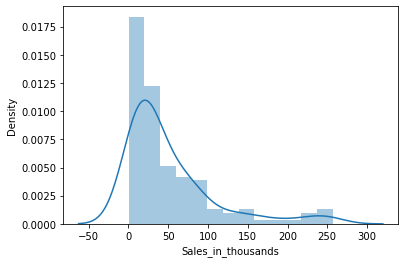

In [29]:
sns.distplot(car2["Sales_in_thousands"]) #it is not normally distributed

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales_in_thousands', ylabel='Density'>

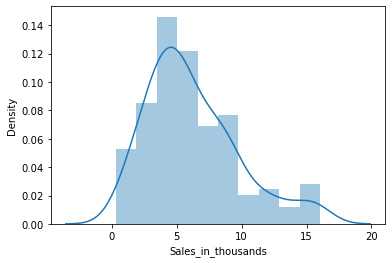

In [30]:
sns.distplot(np.sqrt(car2["Sales_in_thousands"])) #Distribution Plot(Normally)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales_in_thousands', ylabel='Density'>

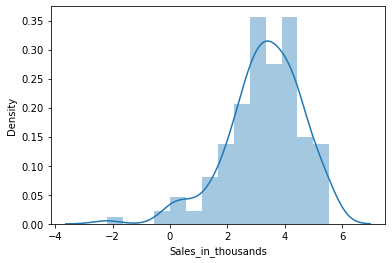

In [31]:
sns.distplot(np.log(car2["Sales_in_thousands"])) #Distribution Plot(Normally)

In [32]:
from scipy.stats import shapiro

In [33]:
shapiro(car2["Sales_in_thousands"])

ShapiroResult(statistic=0.7559575438499451, pvalue=7.179485989278287e-15)

In [34]:
#Null Hyp : H0 :Data is normal
#Alter Hyp : Ha :Data is not normal

In [35]:
shapiro(np.log(car2["Sales_in_thousands"]))

ShapiroResult(statistic=0.9570978879928589, pvalue=9.10503149498254e-05)

In [36]:
car2["Log_sale"]=np.log(car2["Sales_in_thousands"])

In [37]:
# Categorical Variables : freq distribution, missing value. Plot - Pie graph, Histogram, Pareto Analysi

In [38]:
# Numerical Variables : N, Min , max , Percentile Distribution , Normality , Skewness , Std , missing value , outlier etc.

### Bivariate Analysis

In [39]:
# Cat-Cat : Cross table Analysis , Chisquare  etc. 
# Cat-Num : Pareto analysis , testing , Histogram , Cat level summary
# Num-Num : etc......

NameError: name 'pl' is not defined

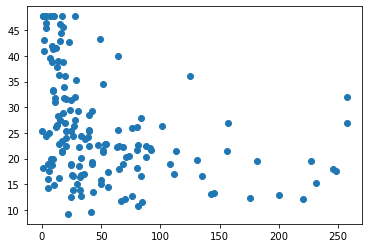

In [40]:
plt.scatter(car2["Sales_in_thousands"], car2["Price_in_thousands"])     #X~Y  Relationship
pl
plt.xlabel("Sales")
plt.ylabel("Price")

Text(0, 0.5, 'Engine_size')

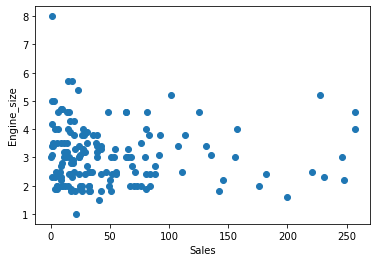

In [45]:
plt.scatter(car2["Sales_in_thousands"], car2["Engine_size"])   #X~Y  Relationship
plt.xlabel("Sales")
plt.ylabel("Engine_size")

In [46]:
car2.columns

Index(['Sales_in_thousands', 'four_year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Vehicle_type', 'Log_sale'],
      dtype='object')

Text(0, 0.5, 'four_year_resale_value')

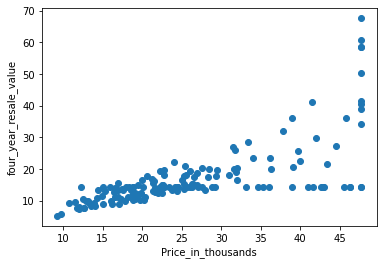

In [47]:
plt.scatter(car2["Price_in_thousands"], car2["four_year_resale_value"])   #X~X  Relationship
plt.xlabel("Price_in_thousands")
plt.ylabel("four_year_resale_value")

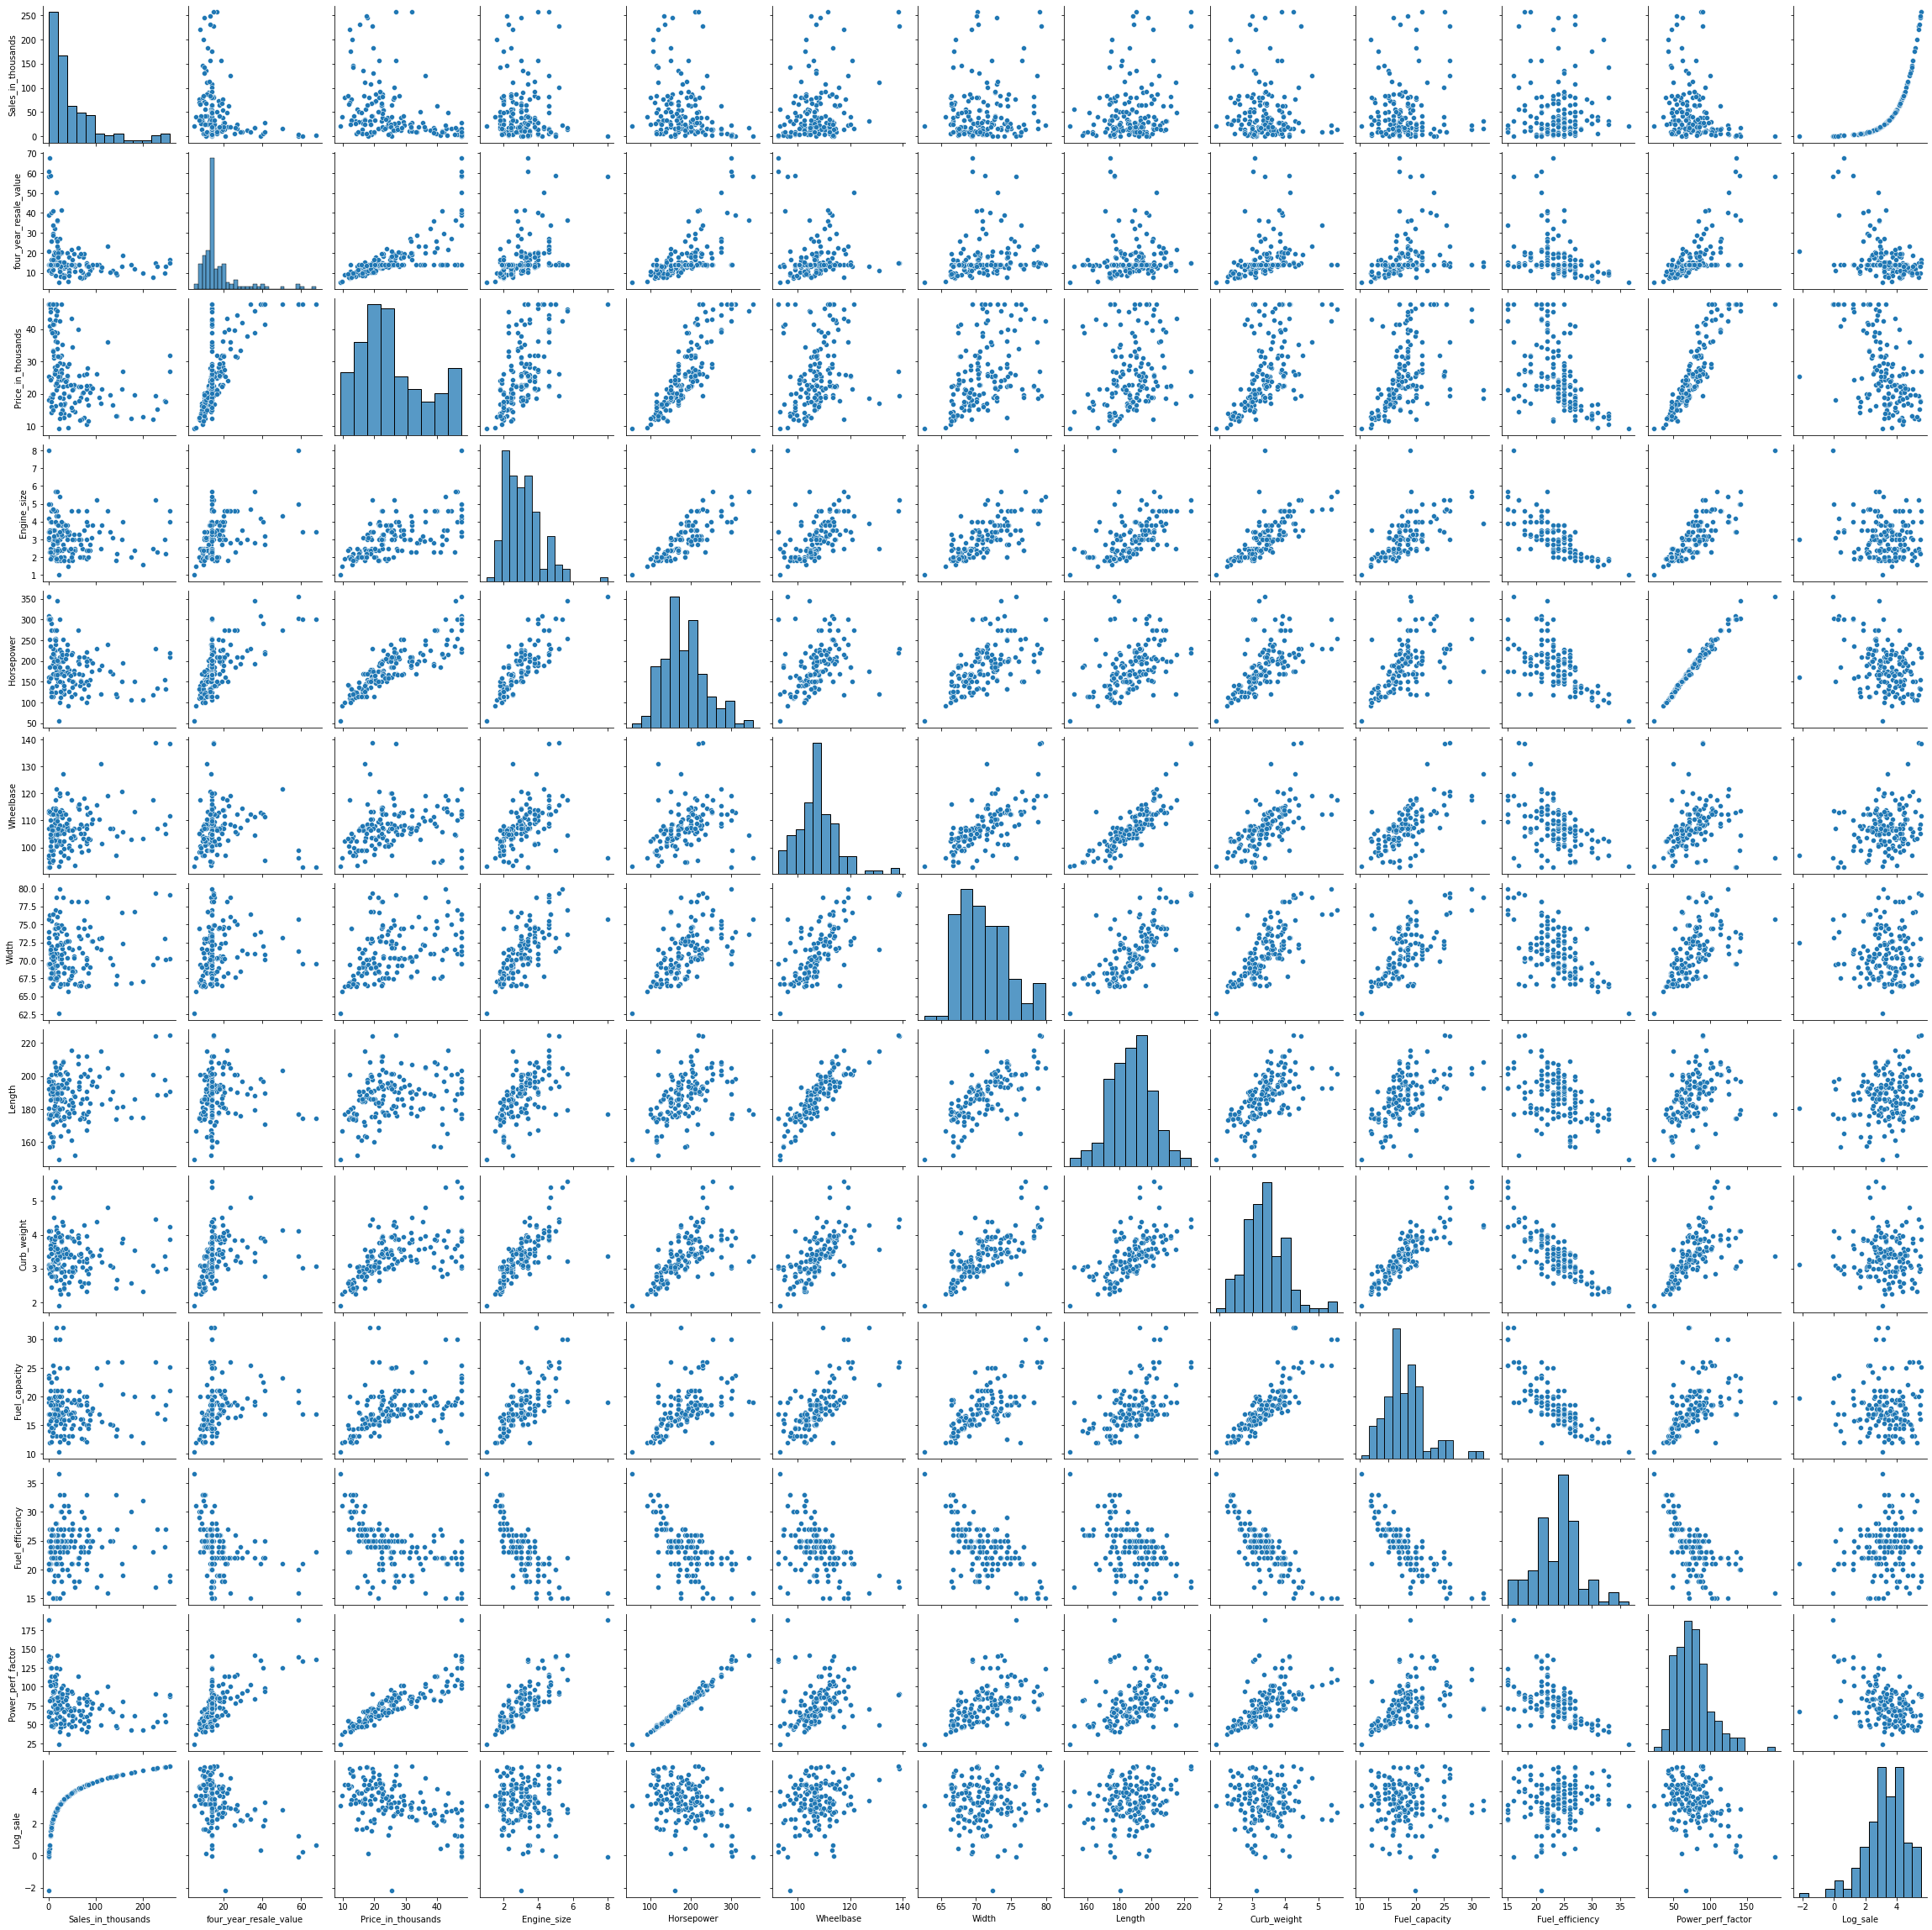

In [48]:
sns.pairplot(car2)   #it shows all plots

In [49]:
corr_car=car2.corr()   #Pearson Correlation; Spearmen rank correlation ( Outlier:)

In [50]:
corr_car

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Log_sale
Sales_in_thousands,1.000000,-0.275365,-0.378050,-0.025033,-0.255077,0.293568,0.094151,0.213194,-0.034830,0.042270,0.034590,-0.279269,0.780401
four_year_resale_value,-0.275365,1.000000,0.700304,0.462297,0.654088,-0.050220,0.165410,0.037985,0.268868,0.260078,-0.337367,0.713331,-0.434751
Price_in_thousands,-0.378050,0.700304,1.000000,0.639344,0.865641,0.192482,0.393438,0.219458,0.605190,0.467532,-0.554263,0.895434,-0.515175
Engine_size,-0.025033,0.462297,0.639344,1.000000,0.821032,0.472143,0.690389,0.541400,0.754120,0.663007,-0.747820,0.818166,-0.145879
Horsepower,-0.255077,0.654088,0.865641,0.821032,1.000000,0.315503,0.548105,0.419469,0.631246,0.518916,-0.618241,0.984150,-0.380631
Wheelbase,0.293568,-0.050220,0.192482,0.472143,0.315503,1.000000,0.683131,0.839606,0.649984,0.654036,-0.498853,0.258958,0.279749
Width,0.094151,0.165410,0.393438,0.690389,0.548105,0.683131,1.000000,0.710316,0.717576,0.656375,-0.598719,0.512229,0.032573
Length,0.213194,0.037985,0.219458,0.541400,0.419469,0.839606,0.710316,1.000000,0.624647,0.563418,-0.429928,0.353364,0.208401
Curb_weight,-0.034830,0.268868,0.605190,0.754120,0.631246,0.649984,0.717576,0.624647,1.000000,0.863809,-0.830866,0.606458,-0.045667
Fuel_capacity,0.042270,0.260078,0.467532,0.663007,0.518916,0.654036,0.656375,0.563418,0.863809,1.000000,-0.819072,0.501431,-0.024421


In [51]:
corr_car.to_csv("corr.csv")

In [52]:
car2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sales_in_thousands      157 non-null    float64
 1   four_year_resale_value  157 non-null    float64
 2   Price_in_thousands      157 non-null    float64
 3   Engine_size             157 non-null    float64
 4   Horsepower              157 non-null    float64
 5   Wheelbase               157 non-null    float64
 6   Width                   157 non-null    float64
 7   Length                  157 non-null    float64
 8   Curb_weight             157 non-null    float64
 9   Fuel_capacity           157 non-null    float64
 10  Fuel_efficiency         157 non-null    float64
 11  Power_perf_factor       157 non-null    float64
 12  Vehicle_type            157 non-null    object 
 13  Log_sale                157 non-null    float64
dtypes: float64(13), object(1)
memory usage: 17

In [53]:
# Dummy creation for Vehicle_type

car2["Vehicle_type"].value_counts()
#car2["Vehicle_dummy"]=np.where(car2["Vehicle_type"]=='Car',0,1)
car3=pd.get_dummies(car2, ["Vehicle_type"], drop_first=True)

In [54]:
car3

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Log_sale,Vehicle_type_Passenger
0,16.919,16.360,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,2.828437,1
1,39.384,19.875,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,3.673360,1
2,14.114,18.225,22.799,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,72.030917,2.647167,1
3,8.588,29.725,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,2.150366,1
4,20.397,22.255,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,3.015388,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,3.545,14.180,24.400,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812,1.265538,1
153,15.245,14.180,27.500,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495,2.724252,1
154,17.531,14.180,28.800,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978,2.863971,1
155,3.493,14.180,45.500,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357,1.250761,1


In [55]:
from sklearn.model_selection import train_test_split
train, test=train_test_split(car3, test_size=0.3, random_state=88)  # Train : 70% of data; Test : 30% of data

In [56]:
car3.shape

(157, 14)

In [57]:
train.shape

(109, 14)

In [58]:
test.shape

(48, 14)

In [59]:
48/157

0.3057324840764331

In [60]:
109/157

0.6942675159235668

In [61]:
train.columns

Index(['Sales_in_thousands', 'four_year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Log_sale', 'Vehicle_type_Passenger'],
      dtype='object')

In [62]:
eqn='Sales_in_thousands~four_year_resale_value+Price_in_thousands+Engine_size+Horsepower+Wheelbase+Width+Length+Curb_weight+Fuel_capacity+Fuel_efficiency+Power_perf_factor+Log_sale+Vehicle_type_Passenger'

In [63]:
ols_model=smp.ols(formula=eqn, data=train)
ols_output=ols_model.fit()

In [64]:
print(ols_output.summary())

                            OLS Regression Results                            
Dep. Variable:     Sales_in_thousands   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     18.51
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           1.29e-20
Time:                        15:02:02   Log-Likelihood:                -525.39
No. Observations:                 109   AIC:                             1079.
Df Residuals:                      95   BIC:                             1116.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -218

In [88]:
eqn='Log_sale~Price_in_thousands+Curb_weight+Wheelbase'

In [89]:
ols_model=smp.ols(formula=eqn, data=train)
ols_output=ols_model.fit()
print(ols_output.summary())

                            OLS Regression Results                            
Dep. Variable:               Log_sale   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     32.96
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           4.30e-15
Time:                        17:36:14   Log-Likelihood:                -141.91
No. Observations:                 109   AIC:                             291.8
Df Residuals:                     105   BIC:                             302.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.7892      1

In [92]:
#0.0941*car2["Price_in_thousands"]+0.5542*car2["Curb_weight"]+0.0431*car2["Wheelbase"]+0.7892      

In [94]:
predict_Train_sale=np.exp(ols_output.predict(train))

In [95]:
train1=train.copy()

In [97]:
train1["Predicted_Sale"]=predict_Train_sale

In [98]:
train1

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Log_sale,Vehicle_type_Passenger,Predicted_Sale
55,220.650,7.850,12.050,2.5,119.0,117.5,69.4,200.7,3.086,20.0,23.0,47.389531,5.396578,0,127.752510
104,27.308,15.380,26.399,3.3,170.0,112.2,74.9,194.8,3.991,20.0,21.0,71.171664,3.307180,0,43.542120
36,4.734,12.545,19.045,2.5,163.0,103.7,69.1,190.2,2.879,15.9,24.0,65.650508,1.554771,1,32.554685
109,38.554,14.180,24.150,3.5,215.0,109.0,73.6,195.9,3.455,18.0,24.0,86.272523,3.652060,1,34.825141
98,11.592,14.180,41.600,3.2,215.0,105.9,67.8,180.3,3.213,16.4,26.0,92.925792,2.450315,1,5.162627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,41.184,5.860,9.699,1.5,92.0,96.1,65.7,166.7,2.240,11.9,31.0,36.672284,3.718050,1,39.661219
101,42.643,8.450,13.499,1.8,126.0,99.8,67.3,177.5,2.593,13.2,30.0,50.241978,3.752863,1,39.567678
148,9.569,16.575,19.990,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,48.907372,2.258529,1,25.367044
106,54.158,14.180,22.799,3.3,170.0,104.3,70.4,178.0,3.821,19.4,18.0,69.782944,3.991906,0,39.557045


In [99]:
#R^2 is very low due to #Data points, Variables it should; R^2 > 60%
#

In [117]:
#MSE:
print("MSE Train: " ,np.mean((car2["Sales_in_thousands"]-predict_Train_sale)**2))
print("RMSE Train: " ,np.sqrt(np.mean((car2["Sales_in_thousands"]-predict_Train_sale)**2)))

MSE Train:  2175.0960171987467
RMSE Train:  46.63792466650662


In [118]:
Predicted_test=ols_output.predict(test)
print("MSE Train: " ,np.mean((car2["Sales_in_thousands"]-Predicted_test)**2))
print("RMSE Train: " ,np.sqrt(np.mean((car2["Sales_in_thousands"]-Predicted_test)**2)))

MSE Train:  6028.276037935174
RMSE Train:  77.64197342890748


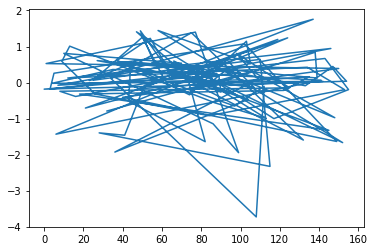

In [187]:
plt.plot(ols_output.resid)

In [119]:
#OLS: With package statsmodels

In [120]:
#OLS method through sklearn package

## SKLearn

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [170]:
y=car3["Log_sale"]
# x=car3.drop(columns=["Sales_in_thousands", "Log_sale"])
x=car3[["Price_in_thousands", "Wheelbase", "Curb_weight"]]

In [171]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=88)

In [172]:
x_train.shape

(109, 3)

In [173]:
x_test.shape

(48, 3)

In [174]:
car2.shape

(157, 14)

In [175]:
y_train.shape

(109,)

In [176]:
LR=LinearRegression()

In [177]:
LR_output=LR.fit(x_train,y_train)

In [178]:
#print(LR_output.summary())

In [179]:
LR_output.coef_  #Betas/m values

array([-0.09405274,  0.04308388,  0.55418913])

In [180]:
x_train.columns

Index(['Price_in_thousands', 'Wheelbase', 'Curb_weight'], dtype='object')

In [181]:
LR_output.intercept_    #Intercepts value

-0.7891529952407859

In [182]:
# VIF:Variance Inflation Factor
# T test to check importance
# Advance model : which helps to get feature importance(DT, RF)

In [183]:
pred_train_y=np.exp(LR_output.predict(x_train))

In [184]:
pred_test_y=np.exp(LR_output.predict(x_test))

In [185]:
print("MSE train: ", np.mean(((y_train-pred_train_y)**2)))
print("RMSE train: ", np.sqrt(np.mean(((y_train-pred_train_y)**2))))

MSE train:  2712.998584906833
RMSE train:  52.086452988342685


In [186]:
print("MSE test: ", np.mean(((y_test-pred_test_y)**2)))
print("RMSE test: ", np.sqrt(np.mean(((y_test-pred_test_y)**2))))

MSE test:  2102.1787407380957
RMSE test:  45.84952279727779
